In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
df=pd.read_csv("/content/gdrive/MyDrive/Gomycode/titanic-passengers.csv",sep=";")


# *****************************************************Data preparation************************************************************

#df.info()
print(df.head(5))
#print(df.isnull().sum().sum())
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(),inplace=True)
#df["Embarked"].fillna
#print(df.head)
print(df["Embarked"].value_counts())
print(df["Cabin"].value_counts())
df["Embarked"].fillna("S",inplace=True)
df["Cabin"].fillna("G6",inplace=True)
#df.isnull().sum()

encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Cabin']=encoder.fit_transform(df['Cabin'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Ticket']=encoder.fit_transform(df['Ticket'])
#df.info()
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }

        )
#plot_correlation_map(df)
#print(df["Sex"].value_counts())
#print(df["Survived"].value_counts())
#print(df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean())
#print(df[["Pclass","Survived"]].groupby(["Survived"],as_index=True).mean())
X = df.drop(["Survived","PassengerId","Name","Ticket"],axis=1)
y = df["Survived"]

#print(X.head(4))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  

In [ ]:
# *************************************************** Splitting and applying Logistic regression ************************************************************

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy={:.2f}".format(logmodel.score(X_test, y_test)))

Accuracy=0.75


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted    0   1
Actual            
0          137  22
1           44  65
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       159
           1       0.75      0.60      0.66       109

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



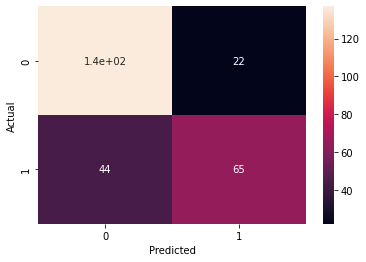

In [ ]:
#****************************************** Confustion matrix *****************************************************************
Confusion_matrix=pd.crosstab(y_test,predictions,rownames=['Actual'],colnames=['Predicted'])
print(Confusion_matrix)
print(sns.heatmap(Confusion_matrix,annot=True))

print(classification_report(y_test, predictions))


In [ ]:
 pred_prob = logmodel.predict_proba(X_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


#Explication:
#La courbe ROC  est une visualisation du taux de faux positifs et du taux de vrais positifs.
# elle calcule la surface (area)